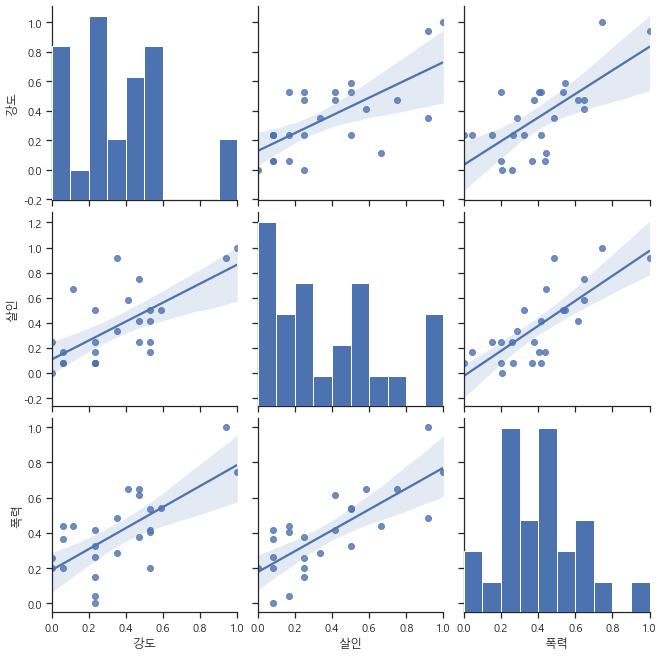

' 강도와 폭력, 살인과 폭력, 강도와 살인 모두 양의 상관관계가 보입니다! \n대각선에 있는 것들은 각각 히스토그램이라 그랬죠? 도수를 알려주는! '

In [1]:
''' 범죄 데이터 시각화하기 '''
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

''' 난 배경이 검은색이니까 이 코드를 넣어주면 편하죠!
x,y ticks까지 보여주는 스타일이라는 거고.'''
sns.set(style = 'ticks', color_codes = True)


''' 먼저 한글 문제부터 해결 '''
import platform
from matplotlib import rc, font_manager
path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family = font_name)

''' 혹시 마이너스가 있을 때는? '''
plt.rcParams['axes.unicode_minus'] = False


crime_norm = pd.read_csv('02. result_crime.csv' , encoding = 'utf-8', index_col = '구별')


sns.pairplot(crime_norm,  vars = ['강도','살인','폭력'], height=3 , kind = 'reg')
''' kind = "reg" 이건, 1차 선형회귀선을 표시해주는 거에요 '''
plt.show()


# 결론
''' 강도와 폭력, 살인과 폭력, 강도와 살인 모두 양의 상관관계가 보입니다! 
대각선에 있는 것들은 각각 히스토그램이라 그랬죠? 도수를 알려주는! '''

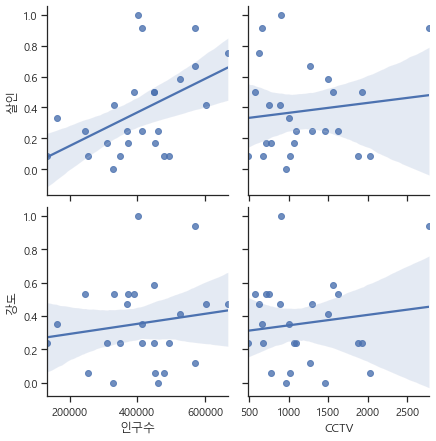

In [23]:
sns.pairplot(crime_norm, x_vars = ['인구수', 'CCTV'] , y_vars = ['살인','강도'] , kind ='reg', height = 3)
plt.show()

# 결론
''' 인구수와 살인의 상관관계가 젤 크게 나옵니다.
나머지는 상관계수가 낮군요...
그래도 CCTV 개수가 낮을 때 강도나 살인이 많이 일어나긴 합니다.
= CCTV수를 기준으로 좌측면에 살인과 강도가 많이 일어남
'''

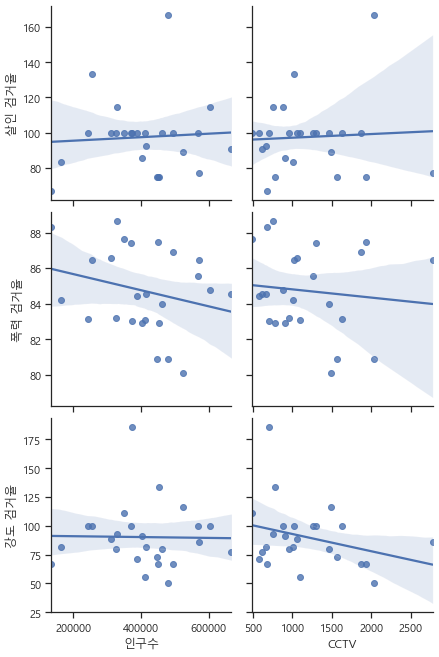

In [27]:
sns.pairplot(crime_norm, x_vars = ['인구수', 'CCTV'] , y_vars = ['살인 검거율','폭력 검거율','강도 검거율'], kind ='reg', height = 3 )
plt.show()

# 결론
''' 어 근데 CCTV랑 검거율들이 양의 상관계수가 아니네! 오히려 음의 상관계수도 보입니다... 왜 그럴까요?
heatmap으로 그려서 한번 봐봅시당
'''

In [29]:
tmp_max = crime_norm['검거율'].max()
''' 검거율 중에 최댓값을 찾아서 '''
crime_norm['검거율'] = crime_norm['검거율'] / tmp_max * 100
''' 그 최댓값을 기준으로 다른 구의 검거율을 비교할 수 있게 백분율로 나눠봅니다. '''
crime_norm.head(15)

,강간,강도,살인,절도,폭력,강간 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율,인구수,CCTV,범죄,검거율
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.73,85.71,76.92,42.86,86.48,570500.0,2780,4.857843,73.553111
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.85,133.33,75.00,33.35,82.89,453233.0,773,1.286607,80.261823
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.35,92.86,114.29,43.10,88.64,330192.0,748,1.641616,83.807174
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.90,100.00,114.29,60.11,84.75,603772.0,884,2.333944,85.957862
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.06,116.67,88.89,30.56,80.11,525515.0,1496,2.860342,76.654796
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.67,185.71,100.00,42.20,83.05,372164.0,707,2.204979,100.000000
구로구,0.515850,0.588235,0.500000,0.456405,0.543439,58.36,73.33,75.00,38.07,80.88,447874.0,1561,2.603930,64.787219
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.79,100.00,133.33,56.67,86.47,255082.0,1015,0.666924,90.973479
노원구,0.273775,0.117647,0.666667,0.405454,0.441902,61.42,100.00,100.00,36.53,85.53,569384.0,1265,1.905445,76.294690


In [30]:
crime_norm_sort = crime_norm.sort_values(by ='검거율', ascending = False)
crime_norm_sort.head(15)

,강간,강도,살인,절도,폭력,강간 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율,인구수,CCTV,범죄,검거율
구별,,,,,,,,,,,,,,
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.67,185.71,100.00,42.20,83.05,372164.0,707,2.204979,100.000000
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.79,100.00,133.33,56.67,86.47,255082.0,1015,0.666924,90.973479
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,103.92,111.11,100.00,44.97,87.63,348646.0,485,0.318627,89.057557
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.90,100.00,114.29,60.11,84.75,603772.0,884,2.333944,85.957862
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.35,92.86,114.29,43.10,88.64,330192.0,748,1.641616,83.807174
양천구,0.051873,0.058824,0.083333,0.296735,0.365391,87.50,50.00,166.67,35.56,80.91,479978.0,2034,0.856156,83.687802
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.39,100.00,100.00,41.09,87.40,369496.0,1294,1.633921,82.143923
용산구,0.265130,0.529412,0.250000,0.177252,0.201287,89.18,100.00,100.00,37.70,83.12,244203.0,1624,1.423080,81.570937
성동구,0.069164,0.235294,0.166667,0.195192,0.044691,94.44,88.89,100.00,37.15,86.54,311244.0,1062,0.711008,80.978055


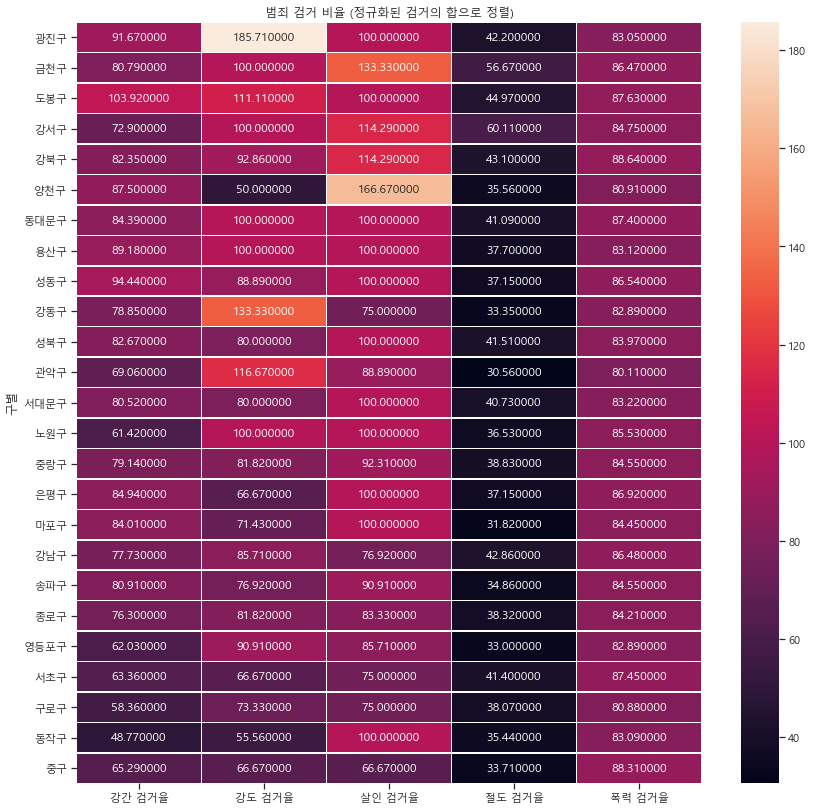

In [35]:
target_col = [
    '강간 검거율',
    '강도 검거율',
    '살인 검거율',
    '절도 검거율',
    '폭력 검거율'
]

plt.figure( figsize = (14,14))
sns.heatmap(crime_norm_sort[target_col] , annot = True, fmt = 'f', linewidths = .5)
''' fmt는 integer format의 약자. d는 정수고 f는 float이겠죠?
'''
plt.title('범죄 검거 비율 (정규화된 검거율의 합으로 정렬)')
plt.show()
# 결론
''' 여기서는 상대적으로 다른 검거율보다는 절도 검거율이 낮다는 걸 알 수 있습니다. 
글고 밑에 강남 3구 중에 서초구에 검거율이 낮을 걸로 나오죠? '''

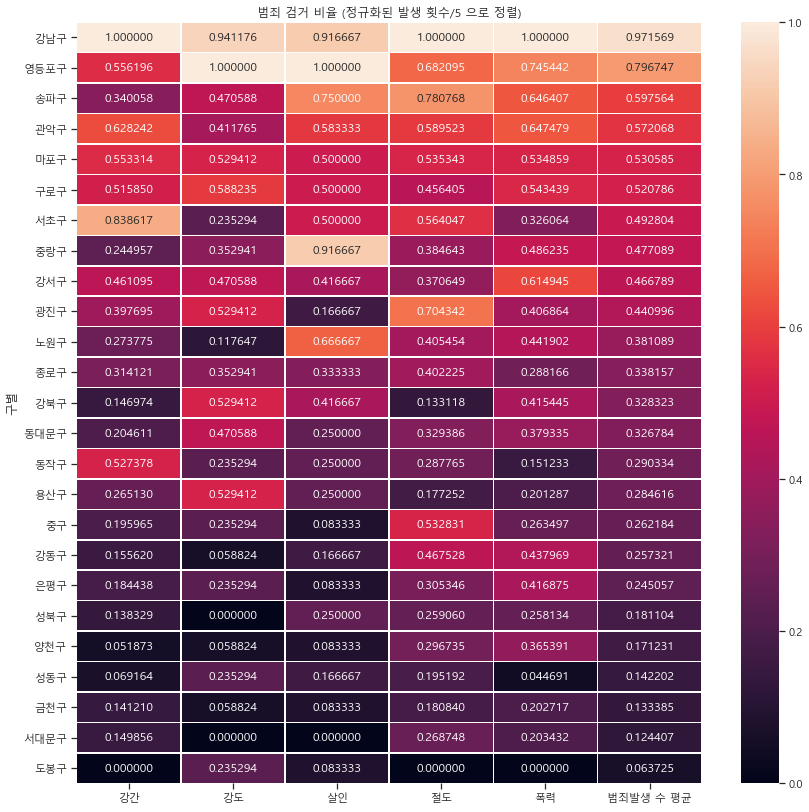

In [42]:
target_col = [
    '강간',
    '강도',
    '살인',
    '절도',
    '폭력',
    '범죄발생 수 평균'
]

crime_norm['범죄발생 수 평균'] = crime_norm['범죄'] / 5

crime_norm_sort_mean = crime_norm.sort_values(by='범죄발생 수 평균' , ascending = False)

plt.figure( figsize = (14,14))
sns.heatmap(crime_norm_sort_mean[target_col] , annot = True, fmt = 'f', linewidths = .5)
''' fmt는 integer format의 약자. d는 정수고 f는 float이겠죠?
'''
plt.title('범죄 검거 비율 (정규화된 발생 횟수/5 으로 정렬)')
plt.show()

# 결론
''' 범죄 발생이 높은 구 보니까 강남구, 송파구가 떡하니 1,3등입니다...  
'''

In [43]:
''' 일단 여기까지 하고 저장합시다잉! '''
crime_norm.to_csv('02 crime_in_Seoul_final.csv', sep = ',', encoding = 'utf-8')